# Лабораторная работа №4

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Bзучение алгоритмов и методов кластеризации на практике.

## Индивидуальное задание

Вариант 2
<br> Таблица для части 1 и части 2. <br>
<table> 
  <tr>
    <td>x1</td>
    <td>3</td>
    <td>3</td>
    <td>6</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
    <td>9</td>
    <td>11</td>
    <td>12</td>
  </tr>
  <tr>
    <td>x2</td>
    <td>9</td>
    <td>8</td>
    <td>9</td>
    <td>7</td>
    <td>4</td>
    <td>5</td>
    <td>3</td>
    <td>5</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>y</td>
    <td>20.9</td>
    <td>20.7</td>
    <td>20.8</td>
    <td>20.9</td>
    <td>22.8</td>
    <td>22.4</td>
    <td>24.5</td>
    <td>22.9</td>
    <td>22.7</td>
    <td>24.6</td>
  </tr>
</table><br>
Таблица для части 3. <br><br>
<table> 
 <tr>
    <td>x</td>
    <td>0</td> 
    <td>1</td> 
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
  </tr>
  <tr>
    <td>y</td>
    <td>12.7</td> 
    <td>20.0</td> 
    <td>24.9</td>
    <td>21.5</td>
    <td>21.3</td>
    <td>20.4</td>
    <td>13.4</td>
    <td>13.1</td>
    <td>4.0</td>
    <td>2.8</td>
  </tr>
</table>

## Ход работы

### Часть 1

In [224]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)
    
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

In [225]:
df_train = make_data(30, 96)
df_test = make_data(69, 100)

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
train_scaled = scaler.fit_transform(df_train) 
test_scaled = scaler.fit_transform(df_test) 

In [227]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
train_labels = kmeans3.fit_predict(train_scaled)
print(train_labels)

[0 1 2 2 1 0 2 2 0 2 1 1 0 0 2 2 1 0 1 0 2 2 1 2 0 0 0 2 0 2 1 2 2 0 2 1 1
 0 0 2 2 2 1 2 0 1 1 0 1 1 0 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 1 1 0 0 0 2 1 0
 1 0 0 0 0 2 1 0 2 2 2 0 0 2 2 0]


Text(0, 0.5, 'y')

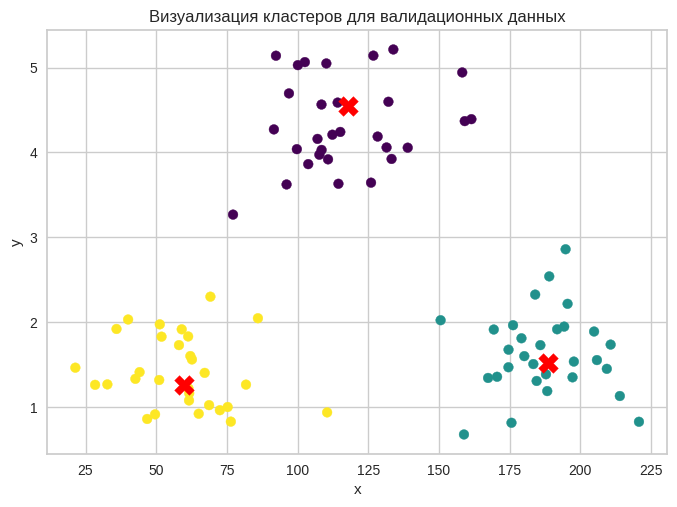

In [228]:
import matplotlib.pyplot as plt
centers = scaler.inverse_transform(kmeans3.cluster_centers_)

plt.scatter(df_train['x'], df_train['y'], c=train_labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров для валидационных данных')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

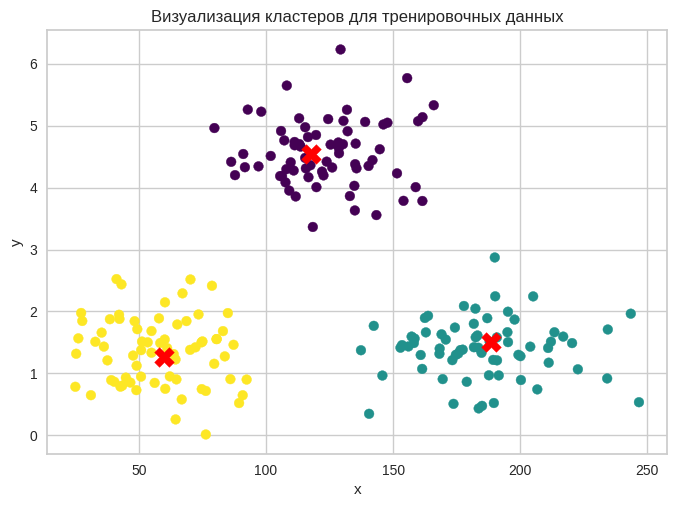

In [229]:
test_labels3 = kmeans3.predict(test_scaled)

centers = scaler.inverse_transform(kmeans3.cluster_centers_)

plt.scatter(df_test['x'], df_test['y'], c=test_labels3, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Визуализация кластеров для тренировочных данных')
plt.xlabel('x')
plt.ylabel('y')

In [230]:
from sklearn.metrics import silhouette_score

silhouette_train = silhouette_score(train_scaled, train_labels)
silhouette_test = silhouette_score(test_scaled, test_labels3)
print(f"Silhouette Score (Train): {silhouette_train}")
print(f"Silhouette Score (Test): {silhouette_test}")

Silhouette Score (Train): 0.7222404932214279
Silhouette Score (Test): 0.7123126820798765


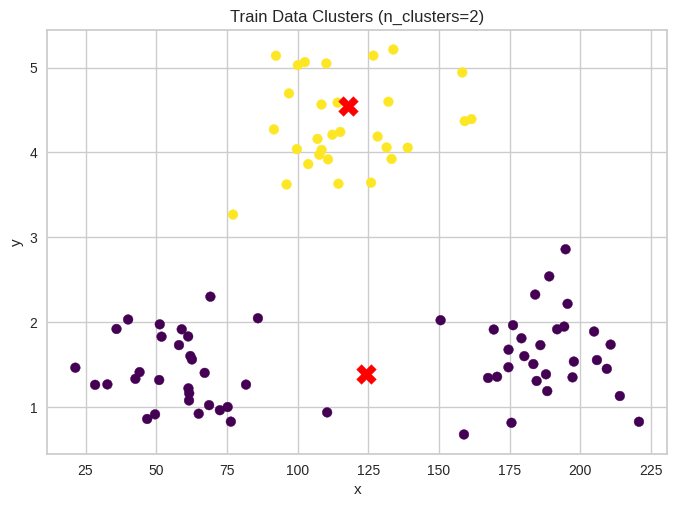

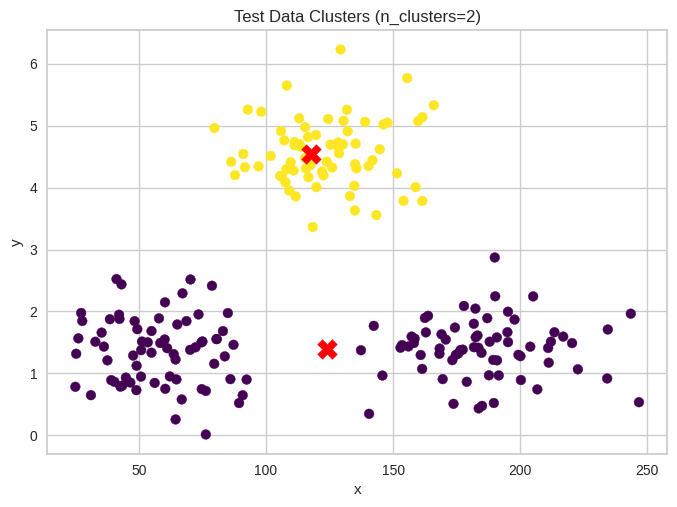

Silhouette Score (Train) for n_clusters=2: 0.48203350652636306
Silhouette Score (Test) for n_clusters=2: 0.4917529762213745


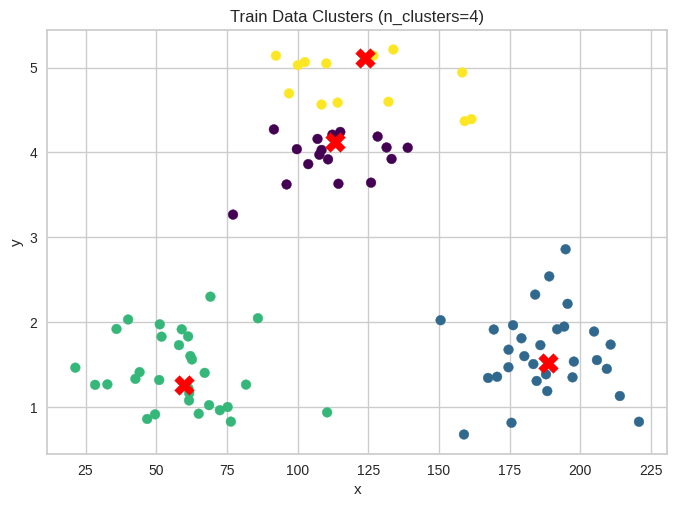

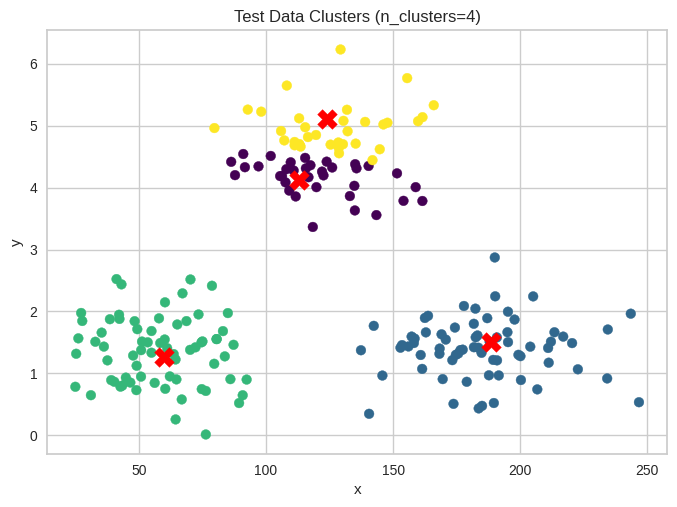

Silhouette Score (Train) for n_clusters=4: 0.6034662424708762
Silhouette Score (Test) for n_clusters=4: 0.5553586196177122


In [231]:
for n_clusters in [2, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    train_labels = kmeans.fit_predict(train_scaled)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Визуализация кластеров для тренировочных данных
    plt.scatter(df_train['x'], df_train['y'], c=train_labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title(f'Train Data Clusters (n_clusters={n_clusters})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Предсказание на тестовых данных
    test_labels = kmeans.predict(test_scaled)

    # Визуализация кластеров для тестовых данных
    plt.scatter(df_test['x'], df_test['y'], c=test_labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title(f'Test Data Clusters (n_clusters={n_clusters})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Силуэт-анализ
    silhouette_train = silhouette_score(train_scaled, train_labels)
    silhouette_test = silhouette_score(test_scaled, test_labels)
    print(f"Silhouette Score (Train) for n_clusters={n_clusters}: {silhouette_train}")
    print(f"Silhouette Score (Test) for n_clusters={n_clusters}: {silhouette_test}")

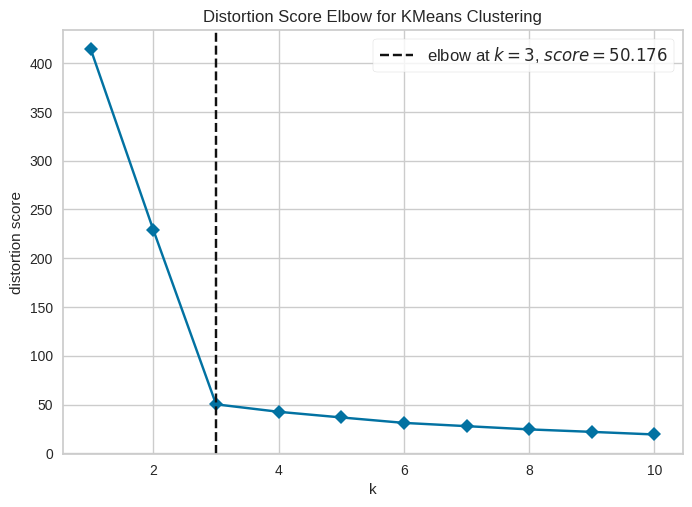

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [232]:
from yellowbrick.cluster import KElbowVisualizer

# model = np.concatenate((df_test, df_train), axis=0)
visualizer = KElbowVisualizer(kmeans3, k=(1,11), timings=False)
visualizer.fit(test_scaled)
visualizer.show()

### Часть 2

In [233]:
import pandas as pd

df = pd.read_csv("2liver.csv")
df

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.50,2
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1


In [234]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123']
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123'],
      dtype='object')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


In [236]:
df['Total_Bilirubin'].fillna(df['Total_Bilirubin'].mean(), inplace=True)
df['Alkaline_Phosphotase'].fillna(df['Alkaline_Phosphotase'].mean(), inplace=True)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             587 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        587 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  587 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


In [237]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_123
19,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145.0,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158.0,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20,35,5.8,2.0,0.50,1


In [238]:
df['Gender'].unique()

array(['Female', 'Male', 'Mal'], dtype=object)

In [239]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Gender'] = df['Gender'].replace('Male', '0')
df['Gender'] = df['Gender'].replace('Female', '1')
df['Gender'] = pd.to_numeric(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [240]:
df['Dataset_123'] = df['Dataset_123'].replace('yes', '1')
df['Dataset_123'] = pd.to_numeric(df['Dataset_123'])
df['Dataset_123'].unique()

array([1, 2])

In [241]:
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4', 34)
df['Aspartate_Aminotransferase'] = pd.to_numeric(df['Aspartate_Aminotransferase'])


In [242]:
import seaborn as sns

# sns.pairplot(df, hue='Dataset_123')
# plt.show()

In [243]:
y = df['Dataset_123']
X = df.drop('Dataset_123', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    int64  
 2   Total_Bilirubin             587 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        587 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    int64  
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  587 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 46.0 KB


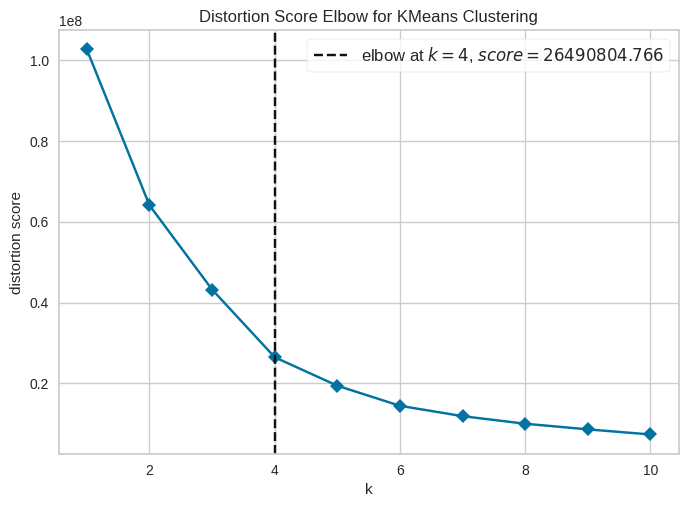

In [244]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(1,11), timings=False)
visualizer.fit(X)
visualizer.show()


cluster = kmeans.fit_predict(X)

In [245]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X)
cluster

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [246]:
# cluster_0_indices = df.index[cluster == 1]

# print("Объекты, относящиеся к кластеру 0:")
# print(df.loc[cluster_0_indices])

Объекты, относящиеся к кластеру 0:
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       1         0.700000               0.1                 187.0   
2     62       0         7.300000               4.1                 490.0   
3     58       0         1.000000               0.4                 182.0   
4     72       0         3.900000               2.0                 195.0   
5     46       0         1.800000               0.7                 208.0   
..   ...     ...              ...               ...                   ...   
582   38       0         1.000000               0.3                 216.0   
583   38       0         3.284957               0.3                 216.0   
584   38       0         1.000000               0.3                 216.0   
585   40       0         0.600000               0.1                  98.0   
586   40       0         0.600000               0.1                  98.0   

     Alamine_Aminotransferase  Aspartate

In [247]:
df['cluster'] = kmeans.labels_ 
df.groupby('cluster').mean() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_123
cluster,,,,,,,,,,,
0,44.378788,0.240530,2.921155,1.288636,236.187435,49.433712,66.244318,6.520076,3.187311,0.966720,1.314394
1,39.150000,0.150000,7.985000,3.715000,338.750000,733.200000,848.500000,6.095000,2.840000,0.858500,1.000000
2,52.162162,0.324324,5.464865,2.721622,1011.459459,85.216216,118.000000,6.191892,2.743243,0.755405,1.081081
3,49.000000,0.000000,12.000000,5.900000,652.000000,1625.000000,3937.500000,6.350000,2.850000,0.900000,1.000000


In [248]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = silhouette_score(X, cluster)
print("Качество кластеризации по метрике Cилуэта", score)

score = adjusted_mutual_info_score(y, cluster, average_method='arithmetic')
print("Качество кластеризации по метрике AMI" , score)

Качество кластеризации по метрике Cилуэта 0.7397073458344975
Качество кластеризации по метрике AMI 0.039457350674819106


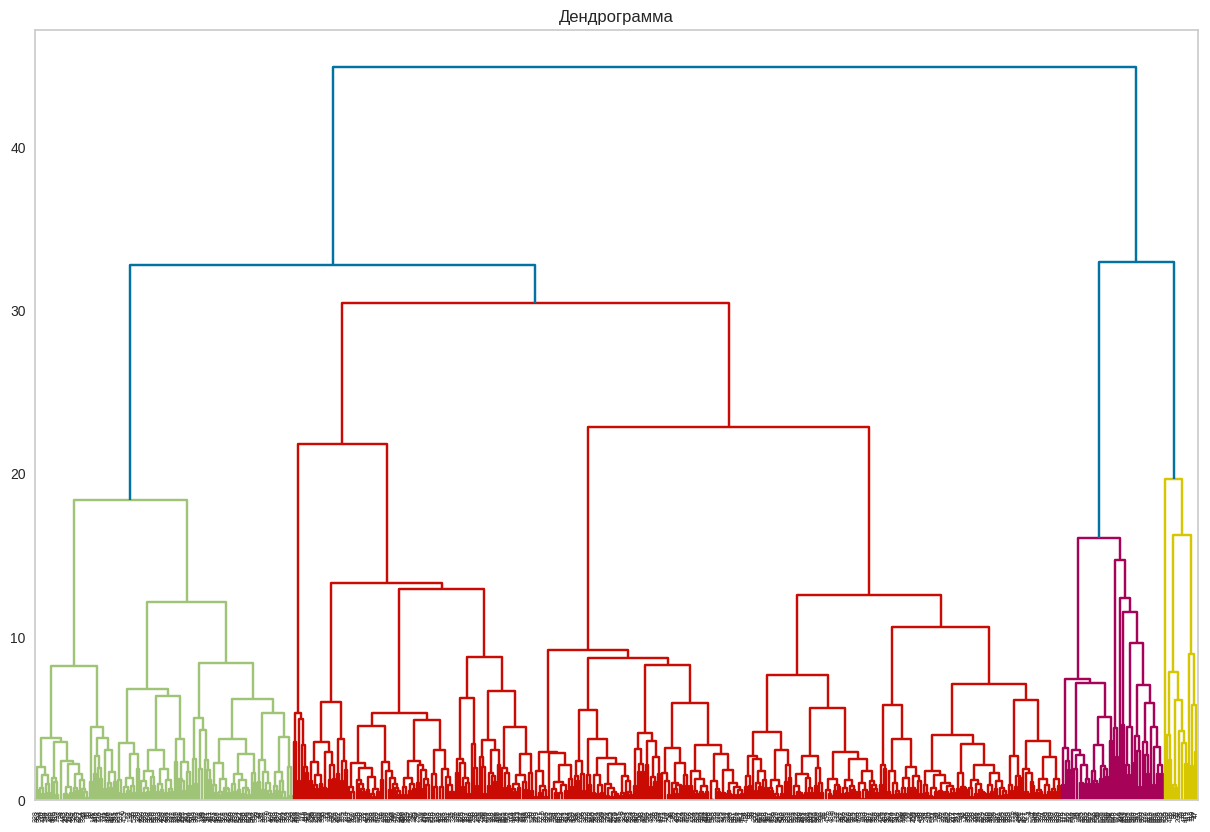

In [249]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()
plt.show()